In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from math import sqrt

path = "/content/drive/MyDrive/dataset/PDOs PY copy.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PY']) #output feature
X = data.drop(['PY'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

# Define the kernel (Radial Basis Function)
kernel = RBF(length_scale=0.5)

# Create a Gaussian Process Regression model
model = GaussianProcessRegressor(kernel=kernel)

# Fit the model to the training data
model.fit(imp_train_X, train_y)
preds = model.predict(imp_test_X)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, preds)))
print("MSE: " + str(mean_squared_error(test_y, preds)))

RMSE = sqrt(mean_squared_error(test_y, preds))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, preds)))


Training X Shape: (242, 31)
Training y Shape: (242, 1)
Testing X Shape: (81, 31)
Testing y Shape: (81, 1)
Training score:  1.0
Mean Absolute Error: 0.4972434351654932
MSE: 0.4672831974373174
RMSE: 0.6835811564381492
R2 score: -0.04379584150587035


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)
Training score:  0.9954594685574427
Mean Absolute Error: 0.07681700375570544
MSE: 0.01389336167132915
RMSE: 0.1178701050789773
R2 score: 0.9867321318232257
[0.98508427 0.95513009 0.99239813 0.97586574 0.9496983  0.97495292
 0.97775966 0.96348685 0.92883069 0.99156558]


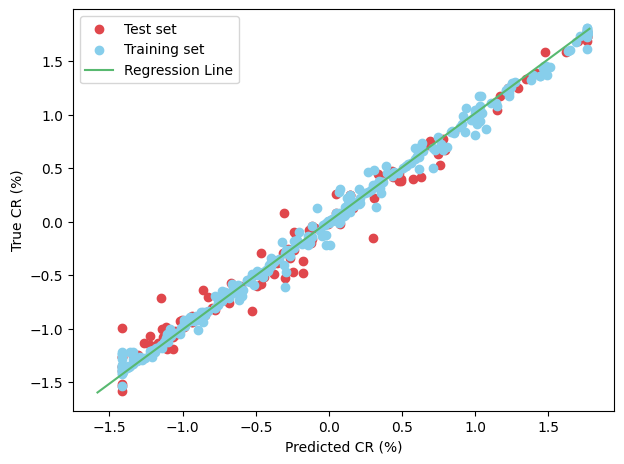

In [ ]:
#like I told you before, the second also the improved one

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, ConstantKernel, DotProduct

from math import sqrt

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['CR (%)']) #output feature
X = data.drop(['CR (%)', 'ECR PY (%)', 'PDOs PY (%)', 'POHs PY (%)', 'V'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

# from sklearn.gaussian_process.kernels import Matern

# # Define the Matérn kernel with nu=1.5 (smoothness parameter)
# kernel = Matern(length_scale=1.0, nu=1.5)

# from sklearn.gaussian_process.kernels import Exponentiation

# # Define the exponential kernel with a decay parameter of 1.0
# kernel = Exponentiation(kernel=RBF(length_scale=1.0), exponent=1.0)

from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel

# Define the polynomial kernel with degree=3
kernel = ConstantKernel(1.0) * (WhiteKernel(noise_level=1e-5) + ConstantKernel(1.0) ** 3)

# Create a Gaussian Process Regression model
model = GaussianProcessRegressor(alpha=0.01, kernel=RationalQuadratic(alpha=1, length_scale=1), normalize_y=False)

# Fit the model to the training data
model.fit(imp_train_X, train_y)
preds = model.predict(imp_test_X)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, preds)))
print("MSE: " + str(mean_squared_error(test_y, preds)))

RMSE = sqrt(mean_squared_error(test_y, preds))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, preds)))

#draw draw draw!
import matplotlib.pyplot as plt

plt.xlim(-10,100)
plt.ylim(-10,100)

# Plot the predicted values
plt.scatter(test_y, preds, color='#e0474c', label='Test set') #real values call

train_predictions = model.predict(imp_train_X)
plt.scatter(train_y, train_predictions, color='#87ceeb', label='Training set') #real values call

plt.xlabel("Predicted CR (%)")
plt.ylabel("True CR (%)")
plt.tight_layout()

# Perform K-Fold CV
scores = cross_val_score(model, imp_train_X, train_y, cv=10, scoring='r2')
print (scores)

#regression line
X = preds
Y = test_y

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
 numer += (X[i] - mean_x) * (Y[i] - mean_y)
 denom += (X[i] - mean_x) ** 2
 m = numer / denom #least square method
 c = mean_y - (m * mean_x)

# Plotting Values and Regression Line
max_x = np.max(X) + 0 #extrapolating
min_x = np.min(X) - 0

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
ax = plt.plot(x, y, color='#58b970', label='Regression Line')

#plt.plot([0, 80], [0, 80], color='black', label='Regression line')
#plt.plot(x_sorted, y_pred_sorted,  color='black', label='Regression line')
plt.axis('tight')
plt.legend()


ValueError: Per-column arrays must each be 1-dimensional

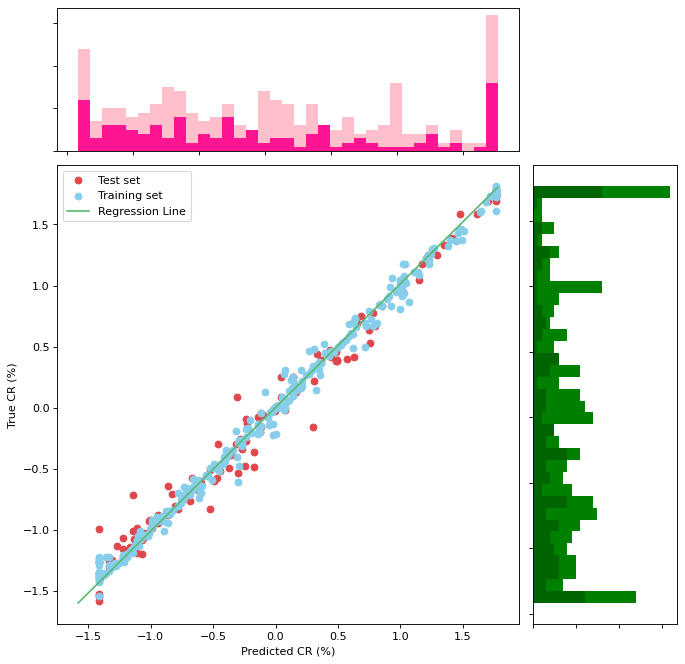

In [ ]:
from seaborn._core.properties import FontSize
import seaborn as sns

#draw draw draw!
import matplotlib.pyplot as plt

#plt.xlim(-10,80)
#plt.ylim(-10,80)

# Create Fig and gridspec - ini figure yg 1st
fig = plt.figure(figsize=(10, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.1, wspace=0.1)

# Define the axes
ax_main = fig.add_subplot(grid[1:, :-1])
ax_right = fig.add_subplot(grid[1:, -1], xticklabels=[], yticklabels=[])
ax_top = fig.add_subplot(grid[0, :-1], xticklabels=[], yticklabels=[])


# Plot the predicted values
ax_main.scatter(test_y, preds, color='#e0474c', label='Test set') #real values call

train_predictions = model.predict(imp_train_X)
ax_main.scatter(train_y, train_predictions, color='#87ceeb', label='Training set') #real values call

# ax_main.xlabel("Predicted PDOs PY (%)")
# ax_main.ylabel("True PDOs PY (%)")
# ax_main.tight_layout()

#regression line
X = preds
Y = test_y

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
 numer += (X[i] - mean_x) * (Y[i] - mean_y)
 denom += (X[i] - mean_x) ** 2
 m = numer / denom #least square method
 c = mean_y - (m * mean_x)

# Plotting Values and Regression Line
max_x = np.max(X) + 0 #extrapolating
min_x = np.min(X) - 0

# Calculating line values x and y
x = np.linspace(min_x, max_x, 100)
y = c + m * x
ax_main.plot(x, y, color='#58b970', label='Regression Line')

#plt.plot([0, 80], [0, 80], color='black', label='Regression line')
#plt.plot(x_sorted, y_pred_sorted,  color='black', label='Regression line')

#decorations
ax_main.set(title='', xlabel='Predicted CR (%)', ylabel='True CR (%)')
ax_main.axis('tight')
ax_main.legend()

# histogram on the right
ax_top.hist(train_y, 35, histtype='stepfilled', orientation='vertical', color='pink')
ax_top.hist(test_y, 35, histtype='stepfilled', orientation='vertical', color='deeppink')
#ax_top.invert_yaxis()

# histogram in the bottom
ax_right.hist(train_y, 35, histtype='stepfilled', orientation='horizontal', color='green')
ax_right.hist(test_y, 35, histtype='stepfilled', orientation='horizontal', color='darkgreen')

#jointplot sns
data_train = pd.DataFrame({'Predicted CR (%)': train_predictions, 'True CR (%)': train_y, '': 'Training set'})
data_test = pd.DataFrame({'Predicted CR (%)': preds, 'True CR (%)': test_y, '': 'Test set'})

data_combined = pd.concat([data_train, data_test])
sns.set(style="ticks")
g = sns.jointplot(data=data_combined, x='Predicted CR (%)', y='True CR (%)', hue='', kind='scatter', height=7, zorder=5)
sns.regplot(data=data_train, x='Predicted CR (%)', y='True CR (%)', ax=g.ax_joint, color='#eeefff') #zorder=1,  scatter=False,
sns.regplot(data=data_test, x='Predicted CR (%)', y='True CR (%)', ax=g.ax_joint, color='orange') #zorder=1,  scatter=False,

# Set the x and y-axis limits
x_min, x_max = -20, 120
y_min, y_max = -20, 120
g.ax_joint.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

In [ ]:
#sometime good, sometime shite. gridsearch

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, ConstantKernel, DotProduct

from math import sqrt

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PDOs PY (%)']) #output feature
X = data.drop(['CR (%)', 'PDOs PY (%)', 'I (A)'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

# y = y.reshape(-1, 1) #normalizing y
# scaler.fit(y)
# y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

#hyperparamter optimization using gridsearch
from sklearn.model_selection import GridSearchCV
random_cv = GridSearchCV(
            estimator=GaussianProcessRegressor(),
            param_grid={'kernel': [RBF(length_scale=1.0), Matern(),
                                   RationalQuadratic(), #ExpSineSquared(),
                                   ConstantKernel(), DotProduct()],
                        'alpha': [1e-10, 1e-5, 1e-2],
                        'normalize_y': [True, False]},
            cv=3, scoring='r2', verbose=0, n_jobs=-1)
#This includes 3-fold validation (cv=3) and uses mean scare error as the metric for evaluation

random_cv.fit(imp_train_X, train_y)

# use the best parameters
best_params = random_cv.best_params_
best_score = random_cv.best_score_
print('Best hyperparameters:', best_params)

# using the best parameters run model
model = GaussianProcessRegressor(**best_params)
model.fit(imp_train_X, train_y)

preds = model.predict(imp_test_X)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, preds)))
print("MSE: " + str(mean_squared_error(test_y, preds)))

RMSE = sqrt(mean_squared_error(test_y, preds))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, preds)))

Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)
Best hyperparameters: {'alpha': 0.01, 'kernel': RationalQuadratic(alpha=1, length_scale=1), 'normalize_y': True}
Training score:  0.999642482986154
Mean Absolute Error: 0.22275823921761836
MSE: 0.31996159586919976
RMSE: 0.565651479154081
R2 score: 0.7159220833489233


Training X Shape: (312, 30)
Training y Shape: (312, 1)
Testing X Shape: (134, 30)
Testing y Shape: (134, 1)
Training score:  0.9995979147935506
Mean Absolute Error: 0.1986495959872138
MSE: 0.3082622945788978
RMSE: 0.5552137377433107
R2 score: 0.7263093085025973
[ 0.84678698  0.82370995  0.89540615  0.91708054 -1.39542567  0.92820108
  0.82187464  0.89560477  0.02520896  0.78617752]


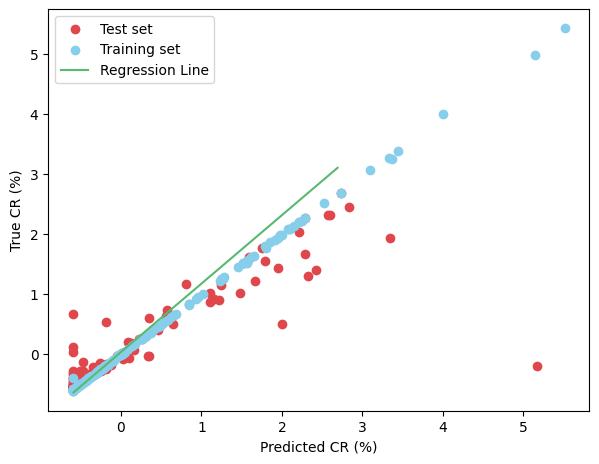

In [2]:
#########like I told you before, the second also the improved one (PDOs PY)

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, ConstantKernel, DotProduct

from math import sqrt

path = "/content/drive/MyDrive/dataset/raw data.csv"
data = pd.read_csv(path)

data = pd.get_dummies(data) #convert categorical variable into dummy variable

y = np.array(data['PDOs PY (%)']) #output feature
X = data.drop(['CR (%)', 'ECR PY (%)', 'PDOs PY (%)', 'POHs PY (%)', 'V'], axis=1) #input feature - axis=1 refers to the column

X_list = list(X.columns) # Saving feature names for later use

from sklearn.preprocessing import StandardScaler #standardscaler for normalization (Jinesh et al., 2023)
scaler = StandardScaler()

y = y.reshape(-1, 1) #normalizing y
scaler.fit(y)
y = scaler.transform(y)

scaler.fit(X) #normalizing X
X = scaler.transform(X)

X = np.array(X) # Convert to numpy array

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)
print('Training X Shape:', train_X.shape)
print('Training y Shape:', train_y.shape)
print('Testing X Shape:', test_X.shape)
print('Testing y Shape:', test_y.shape)

#imputation for missing value using kNN algo
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10) #create an instance of KNNImputer class, k is desired number of neighbours

#perform imputation on on X because y no missing values
imp_train_X = imputer.fit_transform(train_X)
imp_test_X = imputer.fit_transform(test_X)

# from sklearn.gaussian_process.kernels import Matern

# # Define the Matérn kernel with nu=1.5 (smoothness parameter)
# kernel = Matern(length_scale=1.0, nu=1.5)

# from sklearn.gaussian_process.kernels import Exponentiation

# # Define the exponential kernel with a decay parameter of 1.0
# kernel = Exponentiation(kernel=RBF(length_scale=1.0), exponent=1.0)

from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel

# Define the polynomial kernel with degree=3
kernel = ConstantKernel(1.0) * (WhiteKernel(noise_level=1e-5) + ConstantKernel(1.0) ** 3)

# Create a Gaussian Process Regression model
model = GaussianProcessRegressor(alpha=0.01, kernel=RationalQuadratic(alpha=1, length_scale=1), normalize_y=False)

# Fit the model to the training data
model.fit(imp_train_X, train_y)
preds = model.predict(imp_test_X)

score = model.score(imp_train_X,train_y)
print("Training score: ", score)

print("Mean Absolute Error: " + str(mean_absolute_error(test_y, preds)))
print("MSE: " + str(mean_squared_error(test_y, preds)))

RMSE = sqrt(mean_squared_error(test_y, preds))

print("RMSE: " + str(RMSE))
print("R2 score: " + str(r2_score(test_y, preds)))

#draw draw draw!
import matplotlib.pyplot as plt

plt.xlim(-10,100)
plt.ylim(-10,100)

# Plot the predicted values
plt.scatter(test_y, preds, color='#e0474c', label='Test set') #real values call

train_predictions = model.predict(imp_train_X)
plt.scatter(train_y, train_predictions, color='#87ceeb', label='Training set') #real values call

plt.xlabel("Predicted CR (%)")
plt.ylabel("True CR (%)")
plt.tight_layout()

# Perform K-Fold CV
scores = cross_val_score(model, imp_train_X, train_y, cv=10, scoring='r2')
print (scores)

#regression line
X = preds
Y = test_y

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
 numer += (X[i] - mean_x) * (Y[i] - mean_y)
 denom += (X[i] - mean_x) ** 2
 m = numer / denom #least square method
 c = mean_y - (m * mean_x)

# Plotting Values and Regression Line
max_x = np.max(X) + 0 #extrapolating
min_x = np.min(X) - 0

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
ax = plt.plot(x, y, color='#58b970', label='Regression Line')

#plt.plot([0, 80], [0, 80], color='black', label='Regression line')
#plt.plot(x_sorted, y_pred_sorted,  color='black', label='Regression line')
plt.axis('tight')
plt.legend()
